# IMPORTING LIBRARY

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# DATA COLLECTION

In [4]:
data = pd.read_csv('GOOG.csv', date_parser = True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [5]:
data_training = data[data['Date']< '2019-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...,...
3612,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
3613,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
3614,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800
3615,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800


In [6]:
data_test = data[data['Date']>= '2019-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
...,...,...,...,...,...,...,...
3804,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
3805,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3806,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3807,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200


# DATA PREPROCESSING 

In [7]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,49.813290,51.835709,47.800831,49.982655,44871361
1,50.316402,54.336334,50.062355,53.952770,22942874
2,55.168217,56.528118,54.321388,54.495735,18342897
3,55.412300,55.591629,51.591621,52.239197,15319808
4,52.284027,53.798351,51.746044,52.802086,9232276


In [8]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data 

array([[3.30298164e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577158e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885876e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22151352e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54669035e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70461017e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79972283e-02]])

In [9]:
X_train = []
y_train = []

In [10]:
training_data.shape[0]

3617

In [11]:
for i in range(60,training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    y_train.append(training_data[i, 0])

In [12]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
X_train.shape, y_train.shape

((3557, 60, 5), (3557,))

# Building LSTM

In [64]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout 

In [65]:
regressior = Sequential()

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressior.add(Dropout(0.05))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.05))

regressior.add(LSTM(units = 100, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.05))

regressior.add(LSTM(units = 120, activation = 'relu'))
regressior.add(Dropout(0.05))

regressior.add(Dense(units = 1))

In [66]:
regressior.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 60, 60)            15840     
_________________________________________________________________
dropout_12 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_13 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 60, 100)           72400     
_________________________________________________________________
dropout_14 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 120)              

In [81]:
regressior.compile(optimizer='adam', loss='mean_squared_error')

In [82]:
regressior.fit(X_train, y_train, epochs = 50, batch_size=32)

Epoch 1/50
112/112 [==============================] - 16s 104ms/step - loss: 0.0013
Epoch 2/50
112/112 [==============================] - 11s 103ms/step - loss: 5.6459e-04
Epoch 3/50
112/112 [==============================] - 11s 102ms/step - loss: 7.3049e-04
Epoch 4/50
112/112 [==============================] - 12s 103ms/step - loss: 5.9147e-04
Epoch 5/50
112/112 [==============================] - 12s 104ms/step - loss: 6.6097e-04
Epoch 6/50
112/112 [==============================] - 12s 109ms/step - loss: 5.5720e-04
Epoch 7/50
112/112 [==============================] - 12s 108ms/step - loss: 5.2067e-04
Epoch 8/50
112/112 [==============================] - 13s 113ms/step - loss: 4.5218e-04
Epoch 9/50
112/112 [==============================] - 13s 112ms/step - loss: 7.4523e-04
Epoch 10/50
112/112 [==============================] - 12s 109ms/step - loss: 4.5245e-04
Epoch 11/50
112/112 [==============================] - 12s 109ms/step - loss: 4.7346e-04
Epoch 12/50
112/112 [=============

# Prepare Test Dataset

In [83]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [84]:
data_test.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
3749,2019-07-12,1143.989990,1147.339966,1138.780029,1144.900024,1144.900024,864000
3750,2019-07-15,1146.859985,1150.819946,1139.400024,1150.339966,1150.339966,903800
3751,2019-07-16,1146.000000,1158.579956,1145.000000,1153.579956,1153.579956,1238800
3752,2019-07-17,1150.969971,1158.359985,1145.770020,1146.349976,1146.349976,1170000
3753,2019-07-18,1141.739990,1147.604980,1132.729980,1146.329956,1146.329956,1290700
3754,2019-07-19,1148.189941,1151.140015,1129.619995,1130.099976,1130.099976,1647200
3755,2019-07-22,1133.449951,1139.250000,1124.239990,1138.069946,1138.069946,1301500
3756,2019-07-23,1144.000000,1146.900024,1131.800049,1146.209961,1146.209961,1093700
3757,2019-07-24,1131.900024,1144.000000,1126.989990,1137.810059,1137.810059,1589800
3758,2019-07-25,1137.819946,1141.699951,1120.920044,1132.119995,1132.119995,2209800


In [85]:
past_60_days = data_training.tail(60)

In [86]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [87]:
inputs = scaler.transform(df)
inputs

array([[0.93805611, 0.93755773, 0.92220906, 0.91781776, 0.02667489],
       [0.91527437, 0.91792904, 0.91350452, 0.90892169, 0.0142533 ],
       [0.90103881, 0.91343268, 0.89872289, 0.90204445, 0.02331748],
       ...,
       [0.93940683, 0.93712442, 0.93529076, 0.9247443 , 0.01947299],
       [0.92550693, 0.93064972, 0.92791493, 0.9339358 , 0.0195469 ],
       [0.93524016, 0.94894575, 0.95017564, 0.95130949, 0.01398796]])

In [88]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])

In [89]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape 

((192, 60, 5), (192,))

In [90]:
y_pred = regressior.predict(X_test)

In [91]:
scaler.scale_

array([8.18605127e-04, 8.17521128e-04, 8.32487534e-04, 8.20673293e-04,
       1.21162615e-08])

In [92]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [93]:
y_pred = y_pred * scale
y_test = y_test * scale

# Visualization

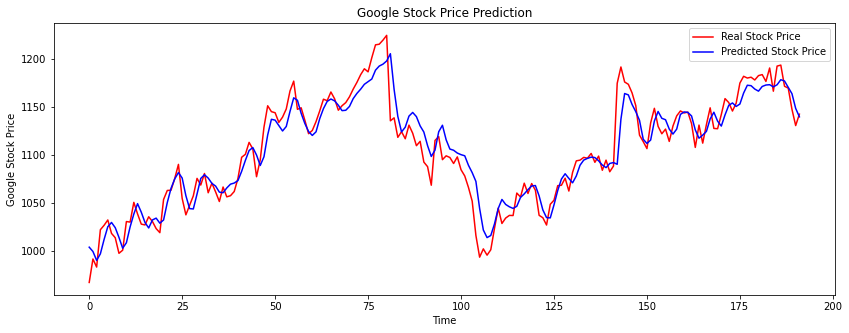

In [94]:
#Visualising the results
plt.figure(figsize=(14,5))
plt.plot (y_test, color = 'red', label = 'Real Stock Price')
plt.plot (y_pred, color = 'blue', label = 'Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt. show()